<!--HEADER-->
*Notas de aula de Modelagem Matemática - 2021/1 [- Ricardo M. S. Rosa (IM/UFRJ)](http://www.im.ufrj.br/rrosa)*

<!--BADGES-->
<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2021p1/notas_de_aula/07.00-Minimos_quadrados_ajuste.ipynb" target="_blank"><img align="left" src="https://img.shields.io/badge/view%20in-nbviewer-orange" alt="View in NBViewer" title="View in NBViewer"></a><a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/julia-env-for-binder-2021p1?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Frmsrosa%252Fmodelagem_matematica%26branch%3Dmodmat2021p1%26urlpath%3Dtree%252Fmodelagem_matematica%252Fnotas_de_aula/07.00-Minimos_quadrados_ajuste.ipynb" target="_blank"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open in binder"></a><a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2021p1/notas_de_aula/slides/07.00-Minimos_quadrados_ajuste.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/view-slides-darkgreen" alt="View Slides" title="View Slides"></a>&nbsp;

<!--NAVIGATOR-->
[<- 6. Análise dimensional e o Teorema de Buckingham-Pi](06.00-BuckinghamPi_analise_dimensional.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [8. Modelos redutíveis ao caso linear nos parâmetros e aplicações ->](08.00-Modelos_redutiveis_linear_aplicacoes.ipynb)

---


# Mínimos quadrados e o ajuste de parâmetros

In [1]:
using Images;

## Ajuste de parâmetros

* Independentemente de como chegamos a um modelo, uma parte importante do processo de modelagem é o ajuste dos parâmetros do modelo.

* O tipo de ajuste depende do tipo de modelagem.

* Veremos aqui, o método de mínimos quadrados, aplicável em modelos lineares nos parâmetros.

## Exemplo: Reta passando por dois pontos

* Considere, para efeito de motivação, o problema de se achar a reta que passa por dois pontos no plano.

* Em uma aplicação, esses pontos seriam os **dados** da **amostra**.

* Vamos supor que eles sejam $(2, 1)$ e $(3, 4)$.

* Nesse caso, a reta passa por $(2,1)$ e tem inclinação $(4-1)/(3-2) = 3$. Logo, é dada por
$$ (y - 1) = 3(x - 2).
$$

* Ou, de outra forma,
$$ y = 3x - 5.
$$

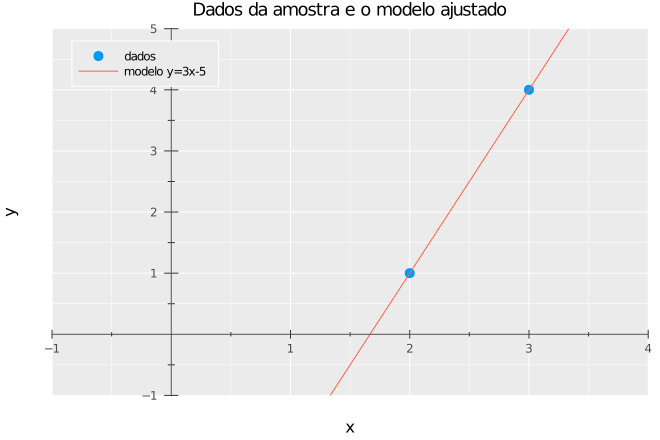

In [2]:
load(joinpath("img","ajuste_reta_a_dois_pontos.png"))

* Podemos, também, enxergar isso como um problema de álgebra linear. Isso é feito procurando-se uma reta $y = mx + b$ que passe pelos dois pontos.

* Nesse caso, temos o problema de **ajustar os parâmetros** $m$ e $b$ aos **dados** $(2,1)$ e $(3,4)$.

* Nesse ajuste, temos as condições
$$ \begin{cases}
  b + 2m = 1, \\
  b + 3m = 4.
\end{cases}
$$

* Em forma matricial,
$$
  \left[ \begin{matrix} 1 & 2 \\ 1 & 3 \end{matrix}\right] \left( \begin{matrix} m \\ b \end{matrix} \right) = \left( \begin{matrix} 1 \\ 4 \end{matrix} \right).
$$

* É fácil resolver o sistema 
$$ \begin{cases}
  b + 2m = 1, \\
  b + 3m = 4.
\end{cases}
$$
usando uma equação pra escrever $b$ em função de $m$ e sem seguida resolvendo a outra equação para $m$.

* Também podemos inverter a matriz associada para achar
$$
   \left( \begin{matrix} b \\ m \end{matrix} \right) = \left[ \begin{matrix} 1 & 2 \\ 1 & 3 \end{matrix}\right]^{-1} \left( \begin{matrix} 1 \\ 4 \end{matrix} \right) = \left[ \begin{matrix} 3 & -2 \\ -1 & 1 \end{matrix}\right] \left( \begin{matrix} 1 \\ 4 \end{matrix} \right) = \left( \begin{matrix} -5 \\ 3 \end{matrix} \right).
$$

* Esse problema sempre tem solução, a menos que os dois pontos estejam na vertical.

## Observações

* Na prática, no entanto, o modelo não é perfeito, os dados não são precisos e a solução não é tão simples.

* Em alguns casos, podemos ter poucos dados, em outros, podemos ter muitos.

* *Poucos dados* nos dão muitas incertezas. Pense no problema de se achar uma reta sobre a qual só temos a informação de um ponto por onde ela passa.

* *Muitos dados* nos dão aproximações, nem sempre muito boas. Pense no problema de se achar uma reta que passa perto de três pontos não-colineares.

## Exemplo: Retas passando por um único ponto

* Digamos, no entanto, que temos apenas um ponto $(1,2)$. (uma simplificação exagerada do que pode acontecer na prática).

* Há infinitas soluções para $m$ e $b$ tais que $y=mx + b$ passe por $(1,2)$, basta que
$$ m + b = 2
$$

* Nesse caso, podemos simplificar o modelo e/ou exigir uma condição a mais.

* Podemos simplificar o modelo exigindo que a reta seja horizontal:
$$ m = 0 \text{ e } b = 2 \quad \Longrightarrow \quad \text{Modelo: } y = 2
$$

* Ou que ela seja homogênea, i.e. passe pela origem:
$$ m = 2 \text{ e } b = 0 \quad \Longrightarrow \quad \text{Modelo: } y = x
$$

* De outro ponto de vista, os modelos acima podem ser vistos como os com o **menor número de parâmetros**.

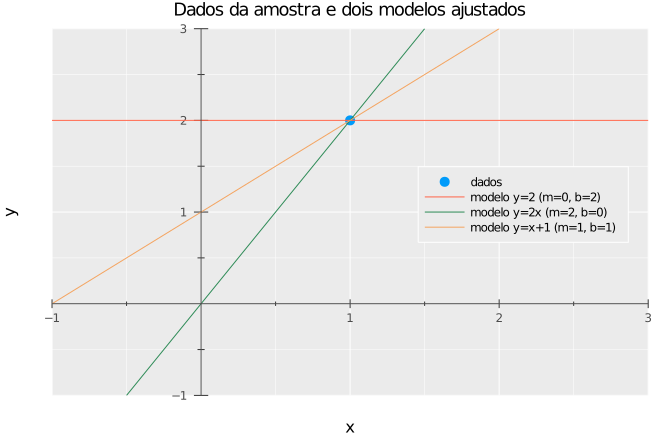

In [3]:
load(joinpath("img","ajuste_reta_a_um_ponto.png"))

* Podemos, também, exigir que a solução seja a de **menor norma euclidiana**: $\sqrt{m^2 + b^2}$. Na verdade isso é equivalente a minimizar $m^2 + b^2$, que é mais fácil por não envolver a raiz quadrada. Nesse caso (verifique!),
$$ m = 1 \text{ e } b = 1 \quad \Longrightarrow \quad \text{Modelo: } y = x + 1
$$

* As soluções acima são tipos de **regularização** (e.g. [LASSO](https://en.wikipedia.org/wiki/Lasso_(statistics)),  [Ridge](https://en.wikipedia.org/wiki/Ridge_regression), [Tikhonov](https://en.wikipedia.org/wiki/Tikhonov_regularization)) de um problema **mal-posto** (no caso, com mais de uma solução). A regularização nos dá uma forma de escolher alguma das possíveis soluções de acordo com algum propósito.

## Exemplo: ajustando uma reta a mais de dois pontos não colineares

* Um problema oposto é o de ajustar uma reta a mais de dois pontos.

* Isso funciona bem quando todos os pontos são colineares.

* Caso contrário, teremos, no máximo, uma *aproximação*.

* Como fazer essa aproximação?

* A resposta tradicional é a de usar **mínimos quadrados**, ou seja, procurar a reta que *minimiza o erro quadrático*.

* Por exemplo, digamos que queiramos ajustar a reta $y=mx + b$ aos pontos $(1,2)$, $(2,1)$ e $(3,4)$.

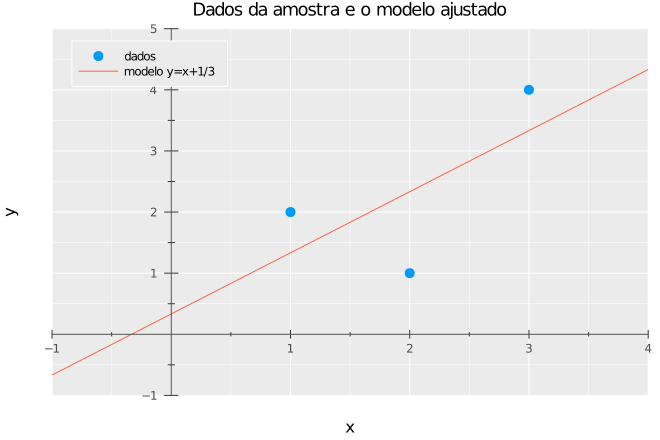

In [4]:
load(joinpath("img","ajuste_reta_a_tres_pontos.png"))

* Se existisse solução exata, ela seria solução do sistema
$$ \begin{cases}
  b + m = 2, \\
  b + 2m = 1, \\
  b + 3m = 4.
\end{cases}
$$

* Em forma matricial,
$$
  \left[ \begin{matrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{matrix}\right] \left( \begin{matrix} m \\ b \end{matrix} \right) = \left( \begin{matrix} 2 \\ 1 \\ 4 \end{matrix} \right).
$$

* É imediato deduzir, a partir da visualização dos pontos no plano, que é impossível achar tal reta. O mesmo pode ser deduzido a partir do sistema linear ou do escalonamento da matriz.

* Mas podemos buscar a solução que melhor aproxima os dados no sentido do erro quadrático, como veremos a seguir.

## Mínimos quadrados

* A ideia, então, é achar a reta mais próxima dos pontos em algum sentido.

* Para cada abscissa $x_i$ de cada ponto $(x_i, y_i)$ da amostra, temos a ordenada correspondente $y_i$ e ordenada $\hat y_i = mx_i + b$ obtida pelo modelo.

* A diferença entre $\hat y_i$ e $y_i$ é chamada de **resíduo** no ponto $i$:
$$ r_i = \hat y_i - y_i.
$$

* O **erro** absoluto em cada ponto é
$$ |y_i - \hat y_i|
$$

* O **erro quadrático** total, ou **soma dos quadrados dos resíduos**, é
$$ E = \sum_{i=1}^N |y_i - \hat y_i|^2,
$$
onde $N=3$, nesse caso (três pontos).

* Buscamos, então, minimizar esse erro:
$$ \operatorname{argmin}_{m,b\in \mathbb{R}} \sum_{i=1}^N |y_i - \hat y_i|^2.
$$

* A função a ser minimizada é suave (quadrática), convexa e coerciva:
$$  E(m,b) = \sum_{i=1}^N |y_i - \hat y_i|^2 = \sum_{i=1}^N |y_i - mx_i - b|^2
$$

* Portanto, existe pelo menos uma solução.

* As soluções podem ser encontradas procurando-se o ponto crítico da função
$$ \nabla E(m,b) = (0,0).
$$

* O gradiente da função $E=\sum_i |y_i - mx_i - b|^2$ é o vetor $\nabla E(m,b) = (\partial_m E, \partial_b E)$ das derivadas parciais
$$ \frac{\partial E}{\partial m} = -2\sum_i (y_i - mx_i - b)x_i = 2(\sum_i x_i^2)m  + 2(\sum_i xi)b -2\sum_i x_iy_i,
$$
$$ \frac{\partial E}{\partial b} = -2\sum_i (y_i - mx_i - b) = 2(\sum_i x_i)m + 2(\sum_i 1))b - 2\sum_i y_i.
$$

* Portanto, os pontos críticos são dados pelo sistema, escrito em forma matricial,
$$
 \left[ \begin{matrix} \sum_i x_i & \sum_i x_i^2 \\ \sum_i 1 & \sum_i x_i\end{matrix} \right] \left(\begin{matrix} b \\ m \end{matrix}\right) = \left(\begin{matrix} \sum_i x_iy_i \\ \sum_i y_i \end{matrix}\right).
$$

* Esse sistema tem uma certa estrutura, que pode não ser clara de imediato, mas que tem a seguinte forma
$$
 \left[ \begin{matrix} 1 & \ldots & 1 \\ x_1 & \ldots & x_N \end{matrix} \right] \left[ \begin{matrix} 1 & x_1 \\ \vdots & \vdots \\ 1 & x_n \end{matrix} \right] \left(\begin{matrix} b \\ m \end{matrix}\right) = \left[ \begin{matrix} 1 & \ldots & 1 \\ x_1 & \ldots & x_N \end{matrix} \right] \left(\begin{matrix} y_1 \\ \vdots \\ y_N \end{matrix}\right).
$$

* Mais ainda, note que a matriz à esquerda é a transposta da matriz seguinte, i.e.
$$\left[ \begin{matrix} 1 & \ldots & 1 \\ x_1 & \ldots & x_N \end{matrix} \right] = \left[ \begin{matrix} 1 & x_1 \\ \vdots & \vdots \\ 1 & x_n \end{matrix} \right]^t
$$

* Isso pode ser visto de uma maneira mais natural, a partir da formulação
$$ \operatorname{argmin}_{m,b\in \mathbb{R}} \sum_{i=1}^N |y_i - mx_i - b|^2.
$$

* A função a ser minimizada por ser reescrita como
$$  \left\|\left(\begin{matrix} y_1 - b - mx_1\\ \vdots \\ y_N - b - m x_N\end{matrix}\right)\right\|^2 = \left\|\left(\begin{matrix} y_1 \\ \vdots \\ y_N \end{matrix}\right) - b \left(\begin{matrix} 1 \\ \vdots \\ 1 \end{matrix}\right) - m \left(\begin{matrix} x_1 \\ \vdots \\ x_N \end{matrix}\right)\right\|^2 = \left\|\left(\begin{matrix} y_1 \\ \vdots \\ y_N \end{matrix}\right) - \left[\begin{matrix} 1 & x_1 \\ \vdots & \vdots \\ 1 & x_N \end{matrix}\right]\left(\begin{matrix} b \\ m \end{matrix}\right)\right\|^2.
$$

* Ou seja, $\|\mathbf{y} - A \boldsymbol{\beta}\|^2$, onde
$$ A = \left[\begin{matrix} 1 & x_1 \\ \vdots & \vdots \\ 1 & x_N \end{matrix}\right], \quad \boldsymbol{\beta} = \left(\begin{matrix} b \\ m \end{matrix}\right), \quad \mathbf{y} = \left(\begin{matrix} y_1 \\ \vdots \\ y_N \end{matrix}\right).
$$


* Para minimizar $E(\boldsymbol{\beta}) = \|\mathbf{y} - A\boldsymbol{\beta}\|^2$, olhamos, novamente, para os seus pontos críticos.

* A derivada direcional de $E(\boldsymbol{\beta})$ na direção de um vetor unitário $\boldsymbol{\alpha}$ é (verifique!)
$$ \nabla E(\boldsymbol{\beta})\cdot \boldsymbol{\alpha} = 2(\mathbf{y} - A\boldsymbol{\beta})\cdot (A\boldsymbol{\alpha}).
$$

* Podemos reescrever isso usando exatamente a transposta de $A$:
$$ \nabla E(\boldsymbol{\beta})\cdot \boldsymbol{\alpha} = 2(A^t(\mathbf{y} - A\boldsymbol{\beta}))\cdot \boldsymbol{\alpha}.
$$

* Ou seja, 
$$ \nabla E(\boldsymbol{\beta}) = 2A^t(\mathbf{y} - A\boldsymbol{\beta}).
$$

* No ponto crítico, devemos ter $\nabla E(\boldsymbol{\beta}) = \mathbf{0}$, ou seja
$$ A^tA\boldsymbol{\beta} = A^t\mathbf{y}.
$$

* Note que isso é exatamente a fórmula obtida anteriormente. Mas agora está mais fácil de ser generalizada!

## Ajustando polinômios de ordem mais alta

* Não precisamos nos restringir a modelos lineares $y=mx + b$.

* Podemos procurar polinômios de ordem mais alta
$$ y = \beta_0 + \beta_1x + \beta_2 x^2 + \ldots + \beta_m x^m.
$$

* E com um determinado número de dados $(x_1, y_1), \ldots, (x_N, y_N)$.

* Nesse caso, os resíduos são
$$  y_i - \beta_0 - \beta_1x_i - \beta_2 x_i^2 - \ldots - \beta_m x_i^m.
$$

* O erro quadrático tem a forma matricial
$$ \left\|\left(\begin{matrix} y_1 \\ \vdots \\ y_N \end{matrix}\right) - \left[\begin{matrix} 1 & x_1 & \ldots & x_1^m \\ \vdots & \vdots & \cdots & \vdots \\ 1 & x_N & \ldots & x_N^m \end{matrix}\right]\left(\begin{matrix} \beta_1 \\ \ldots \\ \beta_m \end{matrix}\right)\right\|^2.
$$

* Os parâmetros a serem ajustados são
$$ \boldsymbol{\beta} = \left( \begin{matrix} \beta_0 \\ \vdots \\ \beta_m \end{matrix} \right).
$$

* E a matriz associada tem a forma de uma **matriz de Vandermonde**:
$$ A = \left[\begin{matrix} 1 & x_1 & \ldots & x_1^m \\ \vdots & \vdots & \cdots & \vdots \\ 1 & x_N & \ldots & x_N^m \end{matrix}\right]
$$

* As soluções $\boldsymbol{\beta}$ são dadas pela chamada **forma normal**
$$ A^tA\boldsymbol{\beta} = A^t\mathbf{y}.
$$

* Note que
$$ A^tA = \left[\begin{matrix} 1 & 1 & \ldots & 1 \\ x_1 & x_2 & \ldots & x_N \\ \vdots & \vdots & \cdots & \vdots \\ x_1^m & x_N^m & \ldots & x_N^m \end{matrix}\right] \left[\begin{matrix} 1 & x_1 & \ldots & x_1^m \\ \vdots & \vdots & \cdots & \vdots \\ 1 & x_N & \ldots & x_N^m \end{matrix}\right]
$$

* Note que $A^tA$ é uma matriz quadrada $m\times m$, para exatamente $m$ parâmetros.

* A sua invertibilidade depende do posto de $A$.

* Caso seja invertível, a solução é única e pode ser escrita na forma
$$ \boldsymbol{\beta} = (A^tA)^{-1}A^t\mathbf{y}.
$$

## Invertibilidade da matriz $A^tA$

* A invertibilidade de $A^tA$ está diretamente ligada ao posto de $A$.

* Observe que o núcleo de $A^t$ é ortogonal à imagem de $A$. De fato, 
$$ \text{se} \quad A^t\boldsymbol{\alpha} = 0 \quad \text{e} \quad \boldsymbol{\gamma} = A\boldsymbol{\beta},
$$
então
$$ \boldsymbol{\alpha} \cdot \boldsymbol{\gamma} = \boldsymbol{\alpha} \cdot A\boldsymbol{\beta} = A^t\boldsymbol{\alpha} \cdot \boldsymbol{\beta} = \mathbf{0} \cdot \boldsymbol{\beta} = \mathbf{0}.
$$
* Assim, se $A^tA\boldsymbol{\beta} = 0$: 
  * $A\boldsymbol{\beta}$ está no núcleo de $A^t$;
  * Então $A\boldsymbol{\beta}$ é ortogonal à imagem de $A$;
  * Mas $A\boldsymbol{\beta}$ também está na imagem de $A$;
  * Assim, $A\boldsymbol{\beta}$ tanto é ortogonal como pertence à imagem de $A$.
  * Logo, $A\boldsymbol{\beta} = 0$.
* E obviamente, se $A\boldsymbol{\beta} = 0$, então $A^tA\boldsymbol{\beta} = 0$. Portanto, temos a equivalência
$$ \text{Núcleo de } A^tA = \text{Núcleo de } A.
$$

* Lembremos, nesse momento, que uma matriz quadrada é invertível se e somente se o seu núcleo se reduz à origem.

* Assim, $A^tA$ é invertível se, e somente se, o núcleo de $A$ tem dimensão nula. Isso é equivalente a dizer que o seu posto é máximo.

* Finalmente, $A$ tem posto máximo/dimensão nula se pelo menos $m$ colunas são linearmente independentes.

* Como podemos garantir que $A$ tenha posto máximo? Ou de outra forma, que tenha $m$ colunas linearmente independentes?

* Para isso, é, primeiramente, necessário que o número de pontos da amostra seja maior do que o número de parâmetros: $N\geq m$.

* Caso contrário, como o contradomínio de $A$ é $N$, o seu posto é limitado por $N$:
$$\operatorname{posto} A \leq N<m.
$$

* Em segundo lugar, quando $N \geq m$, precisamos que as amostras sejam obtidas em pelo menos $m$ abscissas distintas $x_i$.

* De fato, com $m$ abscissas distantas, podemos reordenar as linhas de $A$ para que as abscissas distintas sejam $x_1, \dots, x_m$. 

* Em seguida, olhamos para as primeiras $m$ linhas da matriz $A$, que vamos chamar de $A_m$:
$$ A = \left[\begin{matrix} 1 & x_1 & \ldots & x_1^m \\ \vdots & \vdots & \cdots & \vdots \\ 1 & x_m & \ldots & x_m^m \end{matrix}\right].
$$

* $A_m$ é uma matriz quadrada $m\times m$.

* $A_m$ nada mais é do que composição de $A$ com a projeção $P_m$ de $\mathbb{R}^N= \mathbb{R}^m \times \mathbb{R}^{N-m}$ nas $m$ primeiras coordenadas $\mathbb{R}^m$.

* Assim, se $A_m$ for invertível, então $A_m=P_mA$ tem posto $m$, logo $A$ também o tem.

* $A_m$ é uma matriz de Vandermonde e o seu determinante é dado por
$$ \det A_m = \prod_{j>i} (x_j-x_i).
$$

* Há várias demontrações disso, veja em [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix), mas a mais básica, feita por indução na dimensão $m$, não está lá.

* De qualquer forma, observe que esse determinante é não-nulo se, e somente se, todos os $x_i$'s, para $i=1, \ldots, m$, são distintos.

* Isso é exatamente a nossa hipótese de que pelo menos $m$ dados são obtidos em abscissas distantes.

* Assim, sendo o determinante não-nulo, a matriz $A_m$ é invertível e $A$ tem posto $m$, como queríamos.

## Outros modelos

* O modelo não precisa ser um polinômio, nem ser de um única variável, para ser tratado como feito acima.

* Pode ser, por exemplo, qualquer função da forma
$$ y = \beta_0 f_0(x) + \beta_1 f_1(x) + \ldots + \beta_m f_m(x)
$$

* Nesse caso, 
$$ A = \left[\begin{matrix} f_0(x_1) & f_1(x_1) & \ldots & f_m(x_1) \\ \vdots & \vdots & \cdots & \vdots \\ f_0(x_N) & f_1(x_N) & \ldots & f_m(x_N) \end{matrix}\right]
$$

* Ou, em duas variáveis,
$$ y = \beta_0 + \beta_{1,0}x_1 + \beta_{0,1}x_2 + \beta_{1,1}x_1x_2 + \ldots + \beta_{m_1, m_2}x_1^{m_1}x_2^{m_2} 
$$

* Ou, em várias variáveis
$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_k x_k.
$$

* Ou, analogamente, em mais de duas variáveis e com termos não necessariamente polinomiais.

* O que é importante é que o modelo seja linear nos parâmetros $\boldsymbol{\beta}$. Assim, a forma da matriz $A$ pode mudar, mas o problema de mínimos quadrados continua sendo resolvido por
$$ A^tA\boldsymbol{b} = A^t\boldsymbol{y}.
$$

* A questão da invertibilidade de $A^tA$ vai depender, analogamente, da separação dos valores correspondentes dos termos associados aos parâmetros. (Pense isso!)

## Exercícios

1. Mostre que $(m,b) = (1,1)$ é a solução de $m + b = 2$ que minimiza $m^2 + b^2$.

1. Mostre que $(m,b) = (2,0)$ é a solução de $m + b = 2$ que minimiza $\epsilon|m| + |b|$ para $0<\epsilon<1$. O que acontece no caso $\epsilon=1$? E quando $\epsilon>1$? E se objetivo for minimizar $\max\{|m|,|b|\}$? Ou minimizar $\operatorname{sgn}|m|+\operatorname{sgn}|b|$ (onde $\operatorname{sign}(r) = 0$, se $r=0$, ou $r/|r|$, se $r\neq 0$)?

1. Em qual das abscissas $x=1, \ldots, 5$ temos o resíduo com o maior erro no caso em que o modelo é $\hat y= 5x + x^2$ e a amostra é dada pelos pontos $(x,y) = (1, 2)$, $(2, 3)$, $(3, 4)$, $(4, 3)$ e $(5, 2)$?

1. O que acontece se quisermos ajustar uma parábola $y=ax + bx^2 + c$ aos dados $(1,1)$, $(1,3)$ e $(2,2)$?

1. Se quisermos ajustar um modelo $y=\beta_0 + \beta_1\sin(x) + \beta_2\cos(x)$ a dados $(x_1,y_1)$, $(x_2,y_2)$, $(x_3,y_3)$, qual a condição em $x_1, x_2, x_3$ que garante que existe um, e somente um, conjunto de parâmetros $\boldsymbol{\beta}=(\beta_0, \beta_1, \beta_2)$ que melhor ajusta o modelo no sentido dos mínimos quadrados?

<!--NAVIGATOR-->

---
[<- 6. Análise dimensional e o Teorema de Buckingham-Pi](06.00-BuckinghamPi_analise_dimensional.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [8. Modelos redutíveis ao caso linear nos parâmetros e aplicações ->](08.00-Modelos_redutiveis_linear_aplicacoes.ipynb)